# 25.5.2 Bayesian A/B Testing

for question 2

In [1]:
set.seed(1111) # for replicability
n.draws <- 200000

In [2]:
prior <- data.frame(p.A = runif(n.draws, 0, 1),
p.B = runif(n.draws, 0, 1))

In [3]:
generative.model <- function(p.A, p.B) {
visitors.A <- rbinom(1, 16, p.A)
visitors.B <- rbinom(1, 16, p.B)
c(visitors.A = visitors.A, visitors.B = visitors.B)
}

In [4]:
sim.data <- as.data.frame( t(sapply(1:n.draws, function(i) {
generative.model(prior$p.A[i], prior$p.B[i])})))

In [5]:
posterior <- prior[sim.data$visitors.A == 4 &
sim.data$visitors.B == 8, ]

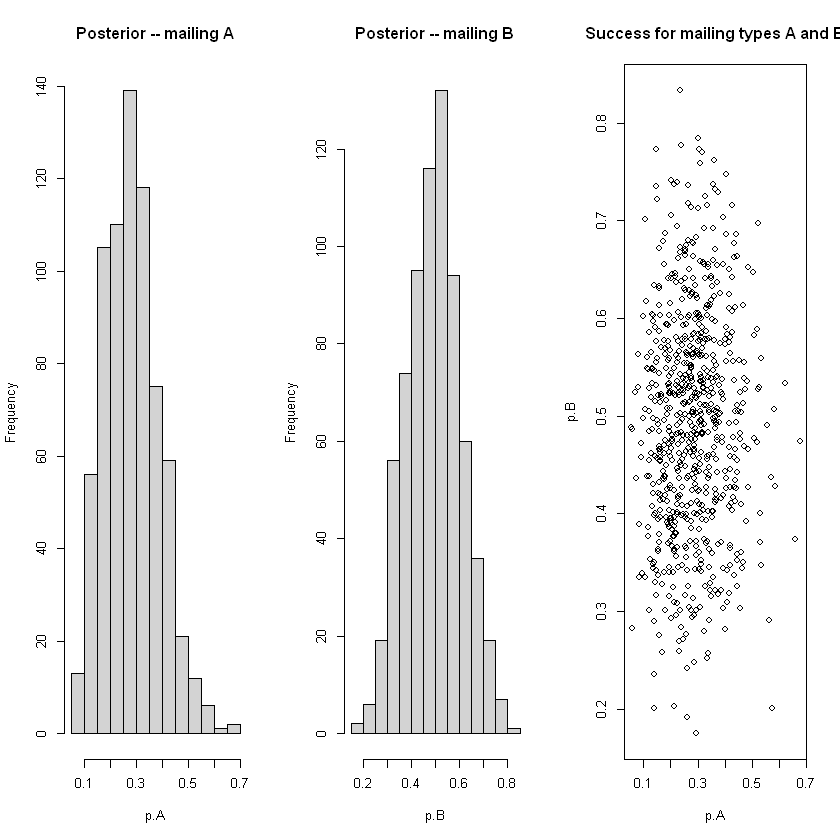

In [6]:
par(mfrow = c(1,3))
hist(posterior$p.A, main = "Posterior -- mailing A",
xlab="p.A")
hist(posterior$p.B, main = "Posterior -- mailing B",
xlab="p.B")
plot(posterior,main = "Success for mailing types A and B",
xlab="p.A", ylab="p.B")

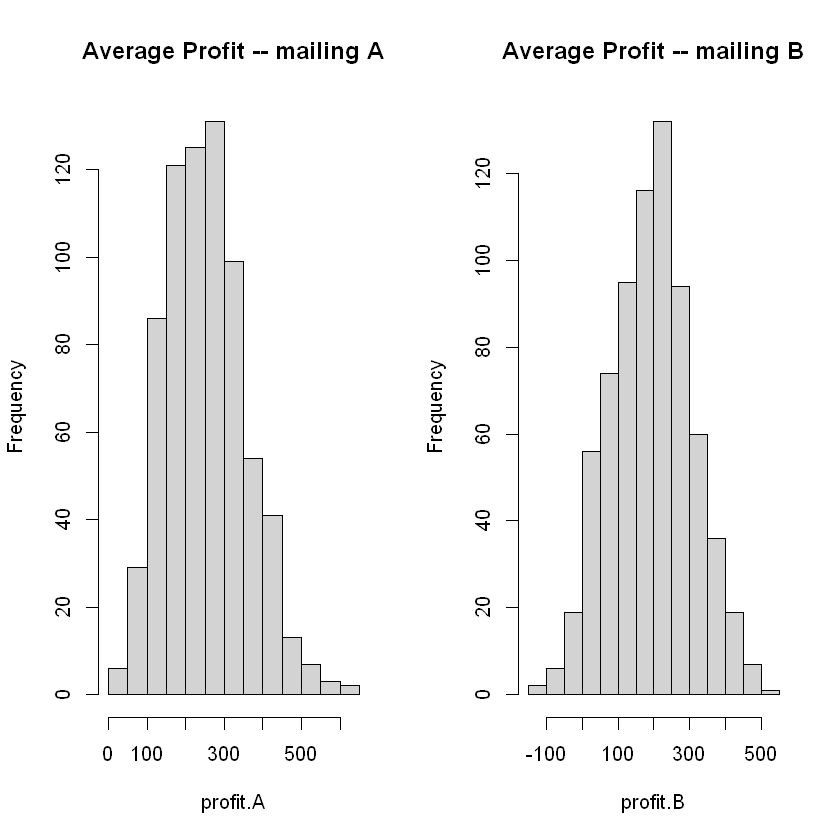

In [7]:
par(mfrow = c(1,2))
avg.profit.A <- -30 + posterior$p.A * 1000
avg.profit.B <- -300 + posterior$p.B * 1000
hist(avg.profit.A, main = "Average Profit -- mailing A",
xlab="profit.A")
hist(avg.profit.B, main = "Average Profit -- mailing B",
xlab="profit.B")

[1] 59.13869

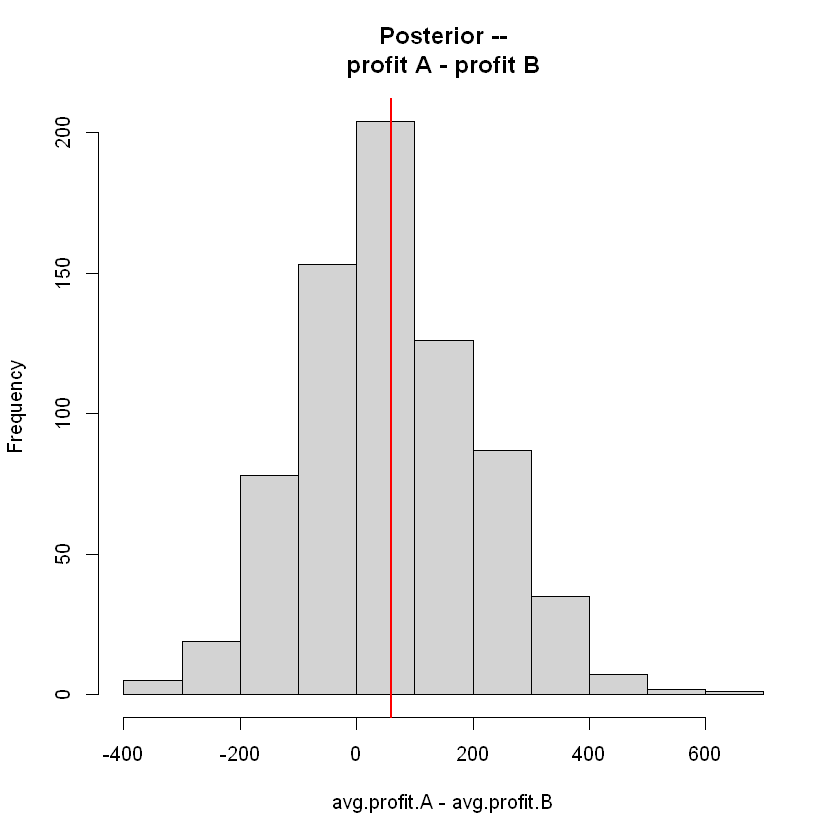

In [8]:
hist(avg.profit.A - avg.profit.B, main="Posterior --
profit A - profit B")
(expected.avg.profit.diff <- mean(avg.profit.A - avg.profit.B))
abline(v = expected.avg.profit.diff , col = "red", lwd =2)